# iris Flower Classification

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('datasets/Iris.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
df.shape

(150, 6)

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
df.drop('Id', axis=1, inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [13]:
df.groupby('Species').count()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


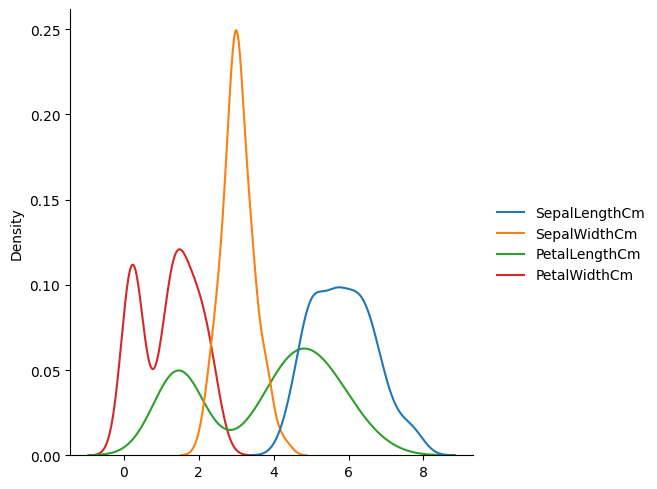

In [14]:
df_col = list(df.columns.drop('Species'))
sns.displot(df, kind = 'kde')

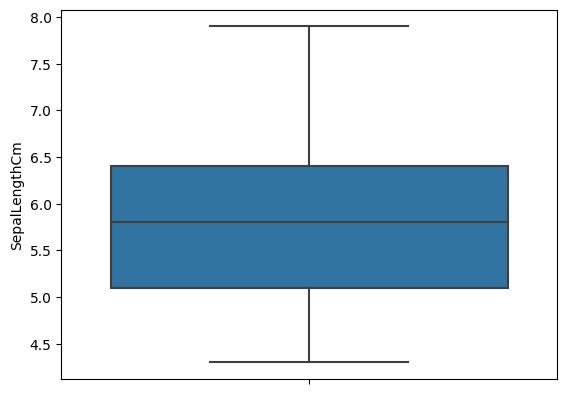

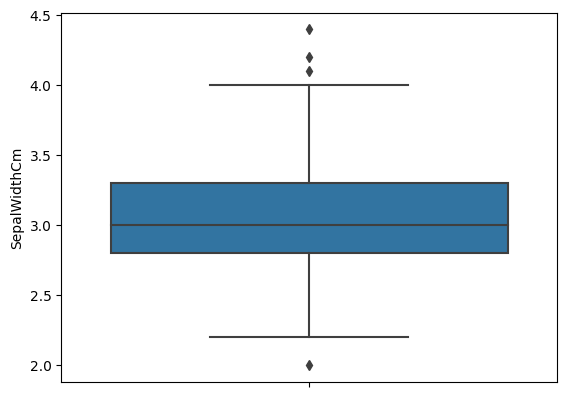

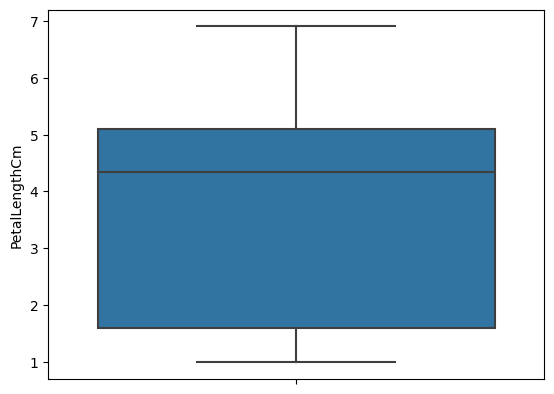

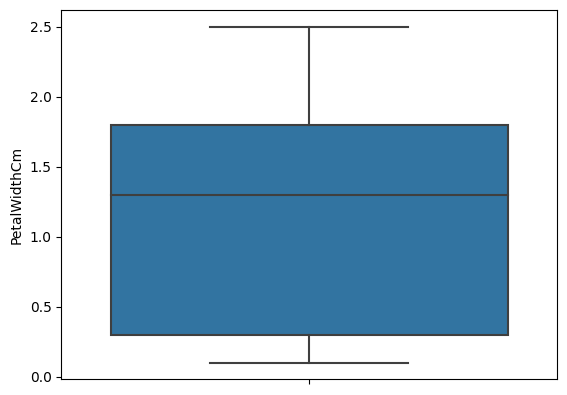

In [15]:
col = list(df.columns)
col=col[0:-1]
for i in col:
    sns.boxplot(y=df[i])
    plt.show()

In [16]:
q1=df['SepalWidthCm'].quantile(0.25)
q3=df['SepalWidthCm'].quantile(0.75)
iqr = q3-q1
df=df[(df['SepalWidthCm']>=q1-1.5*iqr) & (df['SepalWidthCm']<=q3+1.5*iqr)]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


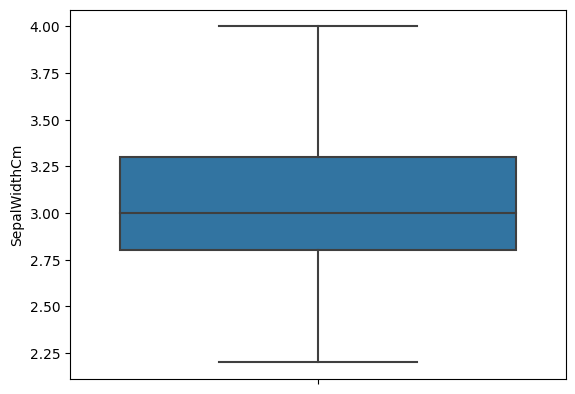

In [17]:
sns.boxplot(y=df['SepalWidthCm'])
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df['Species'])
encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [19]:
df['Species'] = encoder.transform(df['Species'])

In [20]:
X = df.drop(['Species'], axis=1)
y = df['Species']

In [21]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial')
model.fit(X_train, y_train)

model.classes_

array([0, 1, 2])

In [23]:
def pred(test_data):
    data = np.array(test_data)
    data = data.reshape(1, -1)
    
    prediction = model.predict(data)
    if prediction == 0:
        print("Iris-setosa")
    elif prediction == 1:
        print("Iris-versicolor")
    elif prediction == 2:
        print("Iris-verginica")

pred(X_test.iloc[1, :])

Iris-verginica
